# Regression Linéaire Simple du dataset Iris - Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Load Dataset


In [2]:
dataset=pd.read_csv("Advertising.csv")

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


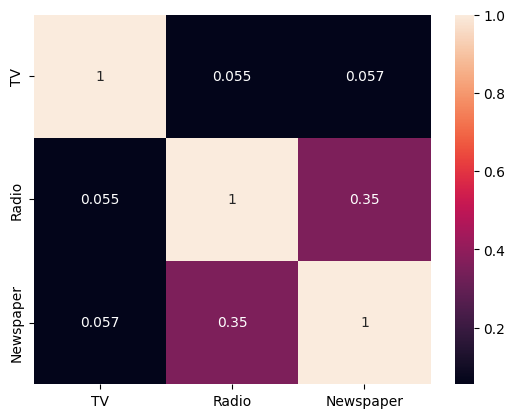

In [4]:
import seaborn as sns
numeric_columns = dataset.drop(columns=['Sales'])
numeric_columns.corr()
plt.figure()
sns.heatmap(numeric_columns.corr(),annot=True)
plt.show()

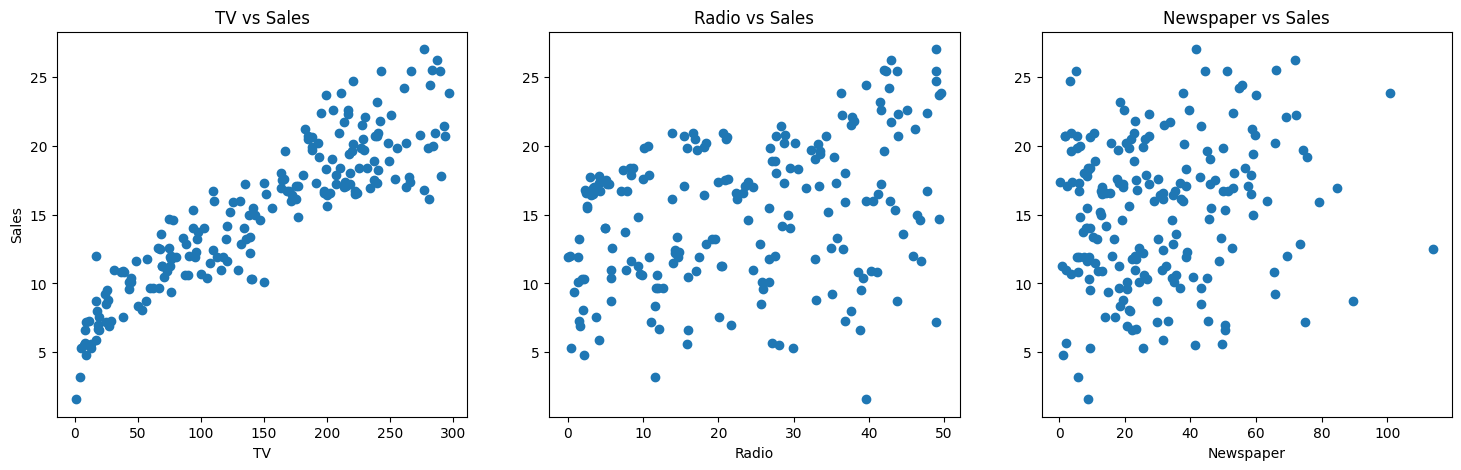

In [5]:
# Visualisation initiale pour comprendre les données
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(dataset['TV'], dataset['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(dataset['Radio'], dataset['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(dataset['Newspaper'], dataset['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')

plt.show()

In [6]:
df=dataset[['Sales','Radio','TV','Newspaper']]
df

,Sales,Radio,TV,Newspaper
0,22.1,37.8,230.1,69.2
1,10.4,39.3,44.5,45.1
2,12.0,45.9,17.2,69.3
3,16.5,41.3,151.5,58.5
4,17.9,10.8,180.8,58.4
...,...,...,...,...
195,7.6,3.7,38.2,13.8
196,14.0,4.9,94.2,8.1
197,14.8,9.3,177.0,6.4
198,25.5,42.0,283.6,66.2


In [7]:

y=dataset.Sales
xt=dataset.TV
xn=dataset.Newspaper
xr=dataset.Radio


In [8]:
y.shape
xt.shape
xn.shape
xr.shape

(200,)

In [9]:
Y=dataset.Sales.values
XT=dataset.TV.values
XN=dataset.Newspaper.values
XR=dataset.Radio.values

In [10]:
XT.shape
XN.shape
XR.shape

(200,)

In [11]:
y=dataset.Sales.values.reshape(200,1)
xt=dataset.TV.values.reshape(200,1)
xn=dataset.Newspaper.values.reshape(200,1)
xr=dataset.Radio.values.reshape(200,1)

In [12]:
print(y.shape)
print(xt.shape)
print(xn.shape)
print(xr.shape)

(200, 1)
(200, 1)
(200, 1)
(200, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [13]:
#X=np.hstack((np.ones((150,1)),x))
XT=np.hstack((xt,(np.ones(xt.shape))))
XN=np.hstack((xn,(np.ones(xn.shape))))
XR=np.hstack((xr,(np.ones(xr.shape))))

In [14]:
print(y.shape)
print(xt.shape)
print(xn.shape)
print(xr.shape)

(200, 1)
(200, 1)
(200, 1)
(200, 1)


# découpage du dataset en dataset d'entrainement et dataset de test


In [15]:
## For TV
xt_train, xt_test, y_train, y_test = train_test_split(xt, y, test_size=0.2, random_state=42)
print(xt_train.shape)
print(xt_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [16]:
#for radio
xr_train, xr_test, y_train, y_test = train_test_split(xr, y, test_size=0.2, random_state=42)
print(xr_train.shape)
print(xr_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [17]:
#For Newspaper
xn_train, xn_test, y_train, y_test = train_test_split(xn, y, test_size=0.2, random_state=42)
print(xn_train.shape)
print(xn_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [18]:
XT_train=np.hstack((xt_train,(np.ones(xt_train.shape))))
XT_test=np.hstack((xt_test,(np.ones(xt_test.shape))))
print(XT_train.shape)
print(XT_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [19]:
XN_train=np.hstack((xn_train,(np.ones(xn_train.shape))))
XN_test=np.hstack((xn_test,(np.ones(xn_test.shape))))
print(XN_train.shape)
print(XN_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [20]:
XR_train=np.hstack((xr_train,(np.ones(xr_train.shape))))
XR_test=np.hstack((xr_test,(np.ones(xr_test.shape))))
print(XR_train.shape)
print(XR_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


Finalement, création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur 
θ, on utilise comme avant np.random.seed(0)

In [21]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
theta2=np.random.randn(2,1)
theta3=np.random.randn(2,1)
print('Theta:',theta)
print('Theta2:',theta2)
print('Theta3:',theta3)

Theta: [[1.76405235]
 [0.40015721]]
Theta2: [[0.97873798]
 [2.2408932 ]]
Theta3: [[ 1.86755799]
 [-0.97727788]]


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.


In [22]:
def model(X, theta):
    return X.dot(theta)

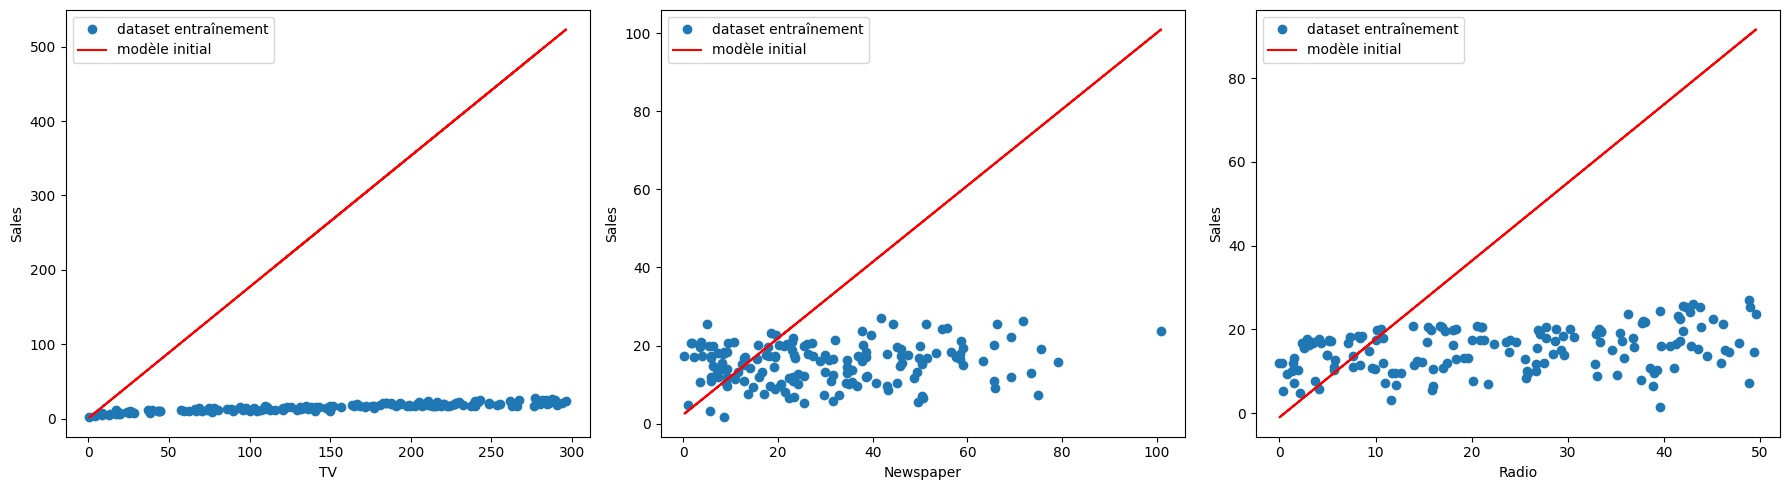

In [23]:
plt.figure(figsize=(18, 5))

# Visualisation pour TV
plt.subplot(1, 3, 1)
plt.plot(xt_train, y_train, 'o', label='dataset entraînement')
plt.plot(xt_train, model(XT_train, theta), c='r', label='modèle initial')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

# Visualisation pour Newspaper
plt.subplot(1, 3, 2)
plt.plot(xn_train, y_train, 'o', label='dataset entraînement')
plt.plot(xn_train, model(XN_train, theta2), c='r', label='modèle initial')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()

# Visualisation pour Radio
plt.subplot(1, 3, 3)
plt.plot(xr_train, y_train, 'o', label='dataset entraînement')
plt.plot(xr_train, model(XR_train, theta3), c='r', label='modèle initial')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()

# Afficher les visualisations attenantes
plt.tight_layout()
plt.show()

In [24]:
pred_tv = model(XT_train, theta)
pred_np= model(XN_train, theta2)
pred_rd = model(XR_train, theta3)

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.
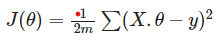

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [25]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [26]:
cost_function(XT_train, y_train, theta)

41517.355521861005

In [27]:
cost_function(XN_train, y_train, theta2)

326.8250875311832

In [28]:
cost_function(XR_train, y_train, theta3)

693.2849205670823

In [29]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [30]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [31]:
n_iterations = 10000
learning_rate = 0.00002


theta_final, cost_history = gradient_descent(XT_train, y_train, theta, learning_rate, n_iterations)

In [32]:
theta2_final, cost_history2 = gradient_descent(XN_train, y_train, theta2, learning_rate, n_iterations)

In [33]:
theta3_final, cost_history3 = gradient_descent(XR_train, y_train, theta3, learning_rate, n_iterations)

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [34]:
#### l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif
cost_history
cost_history2
cost_history3
# voici les parametres du modele une fois que la machine a été entrainée
theta_final
theta2_final
theta3_final

theta_final[0]
theta2_final[0]
theta3_final[0]

array([0.5161082])

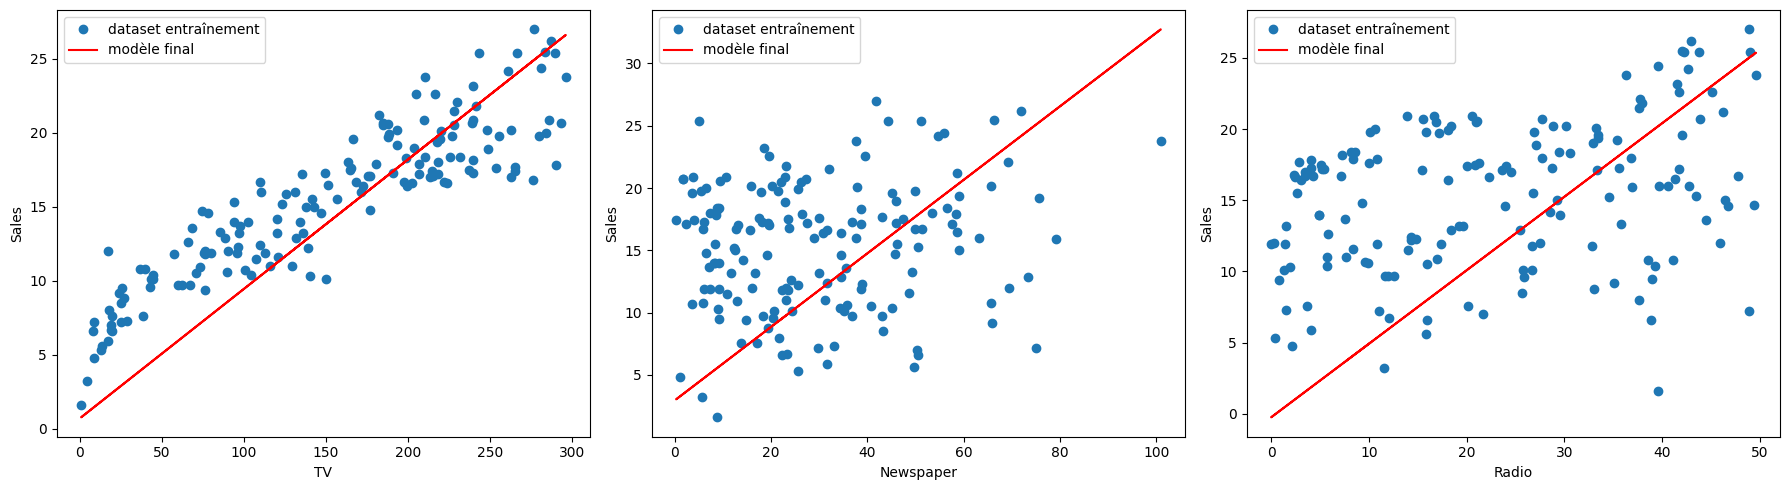

In [35]:
# Définir la taille de la figure
plt.figure(figsize=(18, 5))

# Visualisation pour TV
plt.subplot(1, 3, 1)
plt.plot(xt_train, y_train, 'o', label='dataset entraînement')
plt.plot(xt_train, model(XT_train, theta_final), c='r', label='modèle final')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

# Visualisation pour Newspaper
plt.subplot(1, 3, 2)
plt.plot(xn_train, y_train, 'o', label='dataset entraînement')
plt.plot(xn_train, model(XN_train, theta2_final), c='r', label='modèle final')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()

# Visualisation pour Radio
plt.subplot(1, 3, 3)
plt.plot(xr_train, y_train, 'o', label='dataset entraînement')
plt.plot(xr_train, model(XR_train, theta3_final), c='r', label='modèle final')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()

# Afficher les visualisations attenantes
plt.tight_layout()
plt.show()


NameError: name 'predictions' is not defined

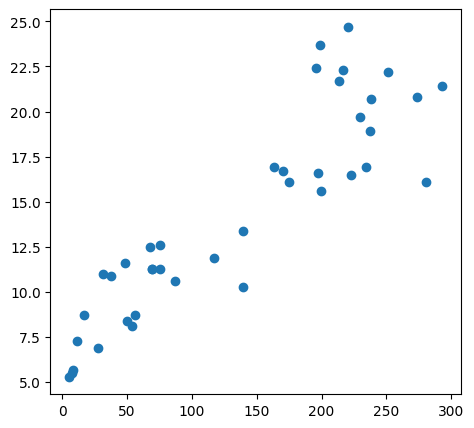

In [36]:
# Définir la taille de la figure
plt.figure(figsize=(18, 5))

# Visualisation des prédictions pour TV
plt.subplot(1, 3, 1)
plt.plot(xt_test, y_test, 'o', label='dataset test')
plt.plot(xt_test, predictions, c='r', label='prédictions')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

# Visualisation des prédictions pour Newspaper
plt.subplot(1, 3, 2)
plt.plot(xn_test, y_test, 'o', label='dataset test')
plt.plot(xn_test, predictions2, c='r', label='prédictions')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()

# Visualisation des prédictions pour Radio
plt.subplot(1, 3, 3)
plt.plot(xr_test, y_test, 'o', label='dataset test')
plt.plot(xr_test, predictions3, c='r', label='prédictions')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()

# Afficher les visualisations attenantes
plt.tight_layout()
plt.show()


## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

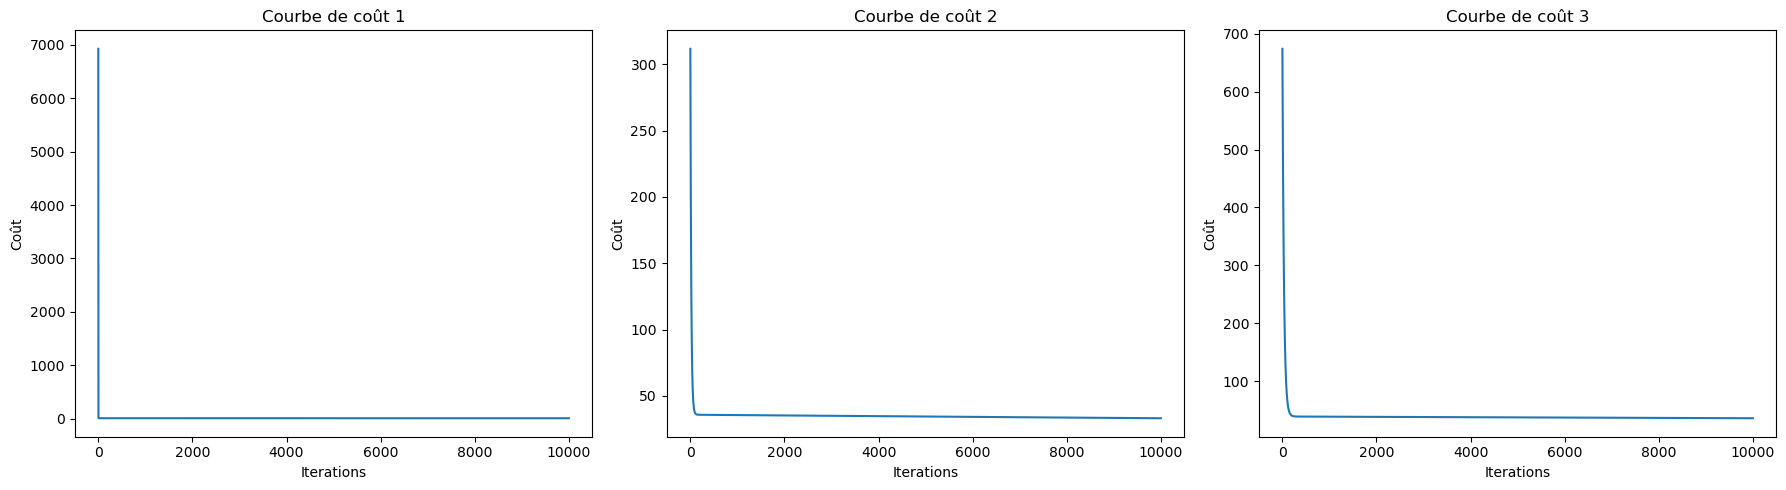

In [ ]:
# Définir la taille de la figure
plt.figure(figsize=(18, 5))

# Visualisation pour la première courbe de coût
plt.subplot(1, 3, 1)
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Courbe de coût 1')

# Visualisation pour la deuxième courbe de coût
plt.subplot(1, 3, 2)
plt.plot(range(n_iterations), cost_history2)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Courbe de coût 2')

# Visualisation pour la troisième courbe de coût
plt.subplot(1, 3, 3)
plt.plot(range(n_iterations), cost_history3)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Courbe de coût 3')

# Afficher les visualisations attenantes
plt.tight_layout()
plt.show()


## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

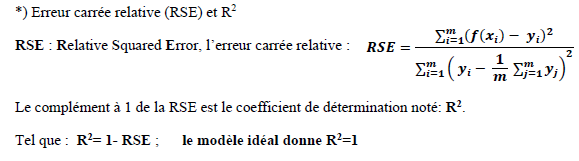

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
print("Coeff de det de Test ")
print("Pour TV : ",coef_determination(y_test, predictions))
print("Pour Newspaper : ",coef_determination(y_test, predictions2))
print("Pour Radio : ",coef_determination(y_test, predictions3))

Coeff de det de Test 
Pour TV :  0.8005190051199944
Pour Newspaper :  0.01413713336729372
Pour Radio :  0.1257170861467216


In [ ]:
print("Coeff de det de Training ")
print("Pour TV : ",coef_determination(y_train, pred_tv))
print("Pour Newspaper : ",coef_determination(y_train, pred_np))
print("Pour Radio : ",coef_determination(y_train, pred_rd))

Coeff de det de Training 
Pour TV :  -3097.3824157849817
Pour Newspaper :  -23.39050106914456
Pour Radio :  -50.73888799065902
